In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('Cleaned_DS_jobs.csv') # reading the data uncleaned
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,...,31,1,1,1,0,0,1,1,data scientist,na
656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na
657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,-1,1,1,1,0,0,1,0,data scientist,na
658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,...,-1,1,0,1,1,0,0,1,data scientist,na


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

# Location vs Salary Estimate
#I want to see how the location affects the Salary in USA states regarding the headquarters

In [28]:
#drop columns I don't need
df.drop(labels=['Job Title', 'Job Description', 'Rating',
       'Company Name', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],axis=1,inplace=True)

In [29]:
#how it looks now
df

,Salary Estimate,Location,min_salary,max_salary,avg_salary
0,137-171,"New York, NY",137,171,154
1,137-171,"Chantilly, VA",137,171,154
2,137-171,"Boston, MA",137,171,154
3,137-171,"Newton, MA",137,171,154
4,137-171,"New York, NY",137,171,154
...,...,...,...,...,...
655,105-167,"Fort Lee, NJ",105,167,136
656,105-167,"San Francisco, CA",105,167,136
657,105-167,"Irwindale, CA",105,167,136
658,105-167,"San Francisco, CA",105,167,136


In [30]:
#And now only with Categorical Columns
df.select_dtypes(include='object')

,Salary Estimate,Location
0,137-171,"New York, NY"
1,137-171,"Chantilly, VA"
2,137-171,"Boston, MA"
3,137-171,"Newton, MA"
4,137-171,"New York, NY"
...,...,...
655,105-167,"Fort Lee, NJ"
656,105-167,"San Francisco, CA"
657,105-167,"Irwindale, CA"
658,105-167,"San Francisco, CA"


In [31]:
df.describe()

,min_salary,max_salary,avg_salary
count,660.000000,660.000000,660.000000
mean,99.296970,148.301515,123.612121
std,33.161485,48.264588,39.786698
min,31.000000,56.000000,43.000000
25%,79.000000,119.000000,103.000000
50%,91.000000,133.000000,114.000000
75%,122.000000,165.000000,136.000000
max,212.000000,331.000000,271.000000


In [32]:
#Checking the values of the most nulls in a column: Salary Estimate
#(nulls-"Null" is a special object that represents the absence of a value.
#A function that does not return a value automatically returns Null.)
df["Salary Estimate"].unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

In [33]:
#check NaN values in a column: Salary Estimate
#(NaN - standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.
#For example, 0/0 is undefined as a real number and is, therefore, represented by NaN.)
print("number of NaN values for the column Salary Estimate :", df['Salary Estimate'].isnull().sum())

number of NaN values for the column Salary Estimate : 0


In [34]:
#Checking the values of the most nulls in a column: Location
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Memphis, TN',
       'Plano, TX', 'West Grove, PA', 'Phoenix, AZ', 'Appleton, WI',
       'Atlanta, GA', 'Orlando, FL', 'Lexington, MA', 'McLean, VA',
       'San Francisco, CA', 'Sheboygan, WI', 'United States',
       'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
       'San

In [35]:
#check NaN values in a column: Location
print("number of NaN values for the column Location :", df['Location'].isnull().sum())

number of NaN values for the column Location : 0


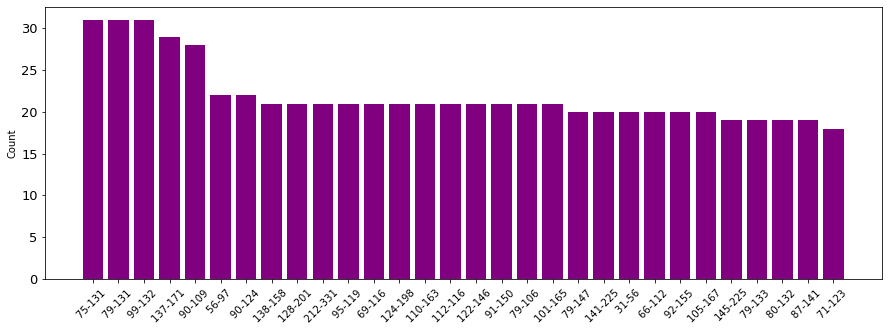

In [36]:
#Checking the salary range counts per city
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(x=df['Salary Estimate'].value_counts().index, height=df['Salary Estimate'].value_counts(),
        color = 'purple')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=13)
plt.ylabel("Count", fontsize=10)
plt.show()

In [37]:
df['State'] = df['Location'].apply(lambda x: x.strip()[-2:])

In [38]:
#How many Data Science jobs does the state have
df.State.value_counts()

CA    165
VA     89
MA     62
NY     52
MD     40
IL     30
DC     26
TX     17
WA     16
OH     14
MO     12
PA     12
es     11
CO     10
NJ     10
NC      9
GA      9
FL      8
TN      8
OK      6
WI      6
IN      5
MI      5
AZ      4
AL      4
MN      4
CT      4
UT      3
NE      3
IA      3
OR      2
SC      2
RI      2
NH      2
LA      1
MS      1
KS      1
DE      1
WV      1
Name: State, dtype: int64

In [39]:
#making it easier for me to copy paste the states for dropping them
#I decided not to do it-
#too much work and  i can still get a lot of info from the states that don't have a lot of job postings
df['State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'TN', 'TX', 'PA',
       'AZ', 'WI', 'GA', 'FL', 'es', 'NE', 'KS', 'NH', 'NJ', 'LA', 'OH',
       'IN', 'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA',
       'MN', 'OK', 'CT', 'NC', 'DE', 'WV'], dtype=object)

In [40]:
df['City'] = df['Location'].apply(lambda x: x.strip().split(",")[0])
df['City'].head(11)

0          New York
1         Chantilly
2            Boston
3            Newton
4          New York
5     Santa Barbara
6         Cambridge
7           Bedford
8         San Diego
9           Chicago
10          Herndon
Name: City, dtype: object

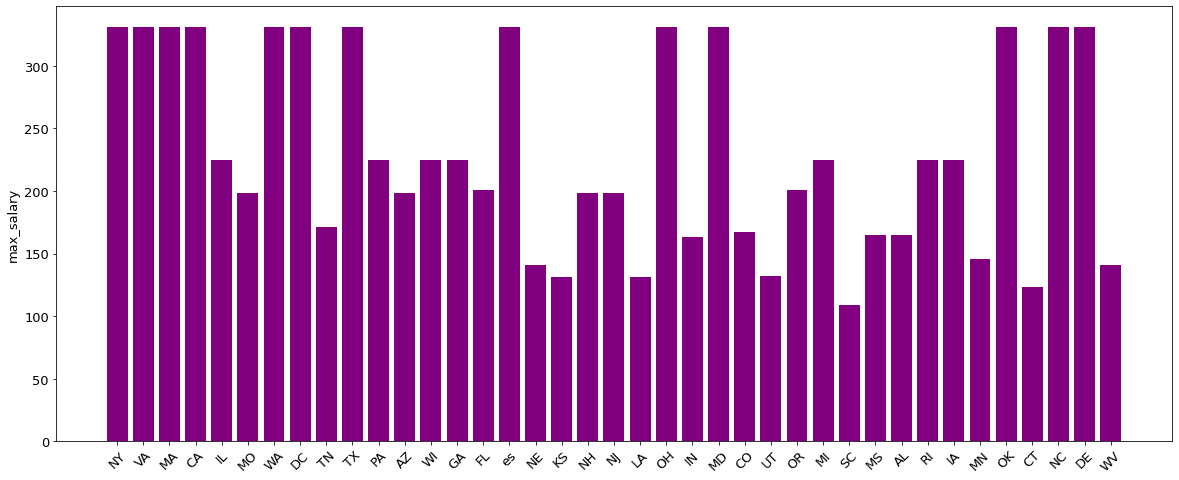

In [114]:
#The amount of different jobs per state
#plt.figure(figsize=(25,15))
#plt.bar(x=df['State'], height=df['avg_salary'],
#        color = 'purple')
#plt.xti(rotation=45, fontsize=13)
#plt.yt(fontsize=13)
#plt.yl("avg_salary", fontsize=13)
#yl,xti = (zip(yl,xti))
#plt.show()

plt.figure(figsize=(20,8))
plt.bar(x=df['State'], height=df['max_salary'],
        color = 'purple')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("max_salary", fontsize=13)
plt.show()

In [74]:
#Answer NY is the place to go live at in USA if you search for highes pay job and highest amount of options
import plotly.graph_objects as go
f = go.FigureWidget()

f.layout.title.text = "Jobs By Top 10 Cities"

f.add_bar(y=df['State'].value_counts()[0:10],name="State", text=df['State'].values,textposition="outside")
f.add_scatter(y=df['City'].value_counts()[0:10], name="Cities",text=df['City'].values, x0=0)

f

FigureWidget({
    'data': [{'name': 'State',
              'text': array(['NY', 'VA', 'MA', ..., 'CA', 'CA', …

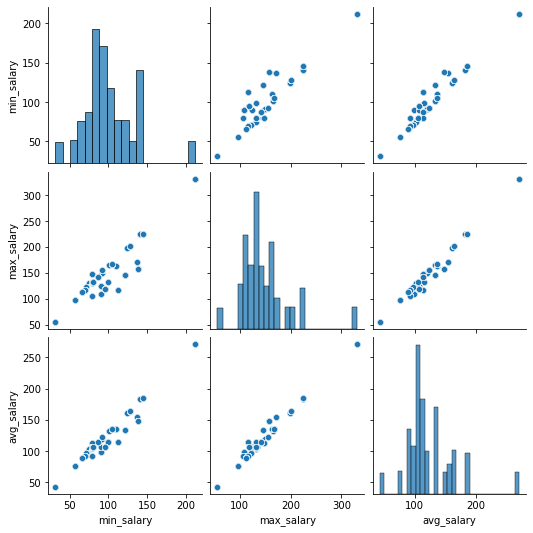

In [57]:
# Look at a pairplot and see if anything stands out JUST FOR FUN AND ANDRE
sns.pairplot(data=df);